# MAT281 - Laboratorio N°03



<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1.- Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categóricas a numéricas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**. 


### 1.-

In [4]:
# Cargamos librerias necesarios
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

# Obtenemos el conjunto de datos con las variables numéricas
aux = ['year','desplazamiento','cilindros','co2','consumo_litros_milla']
df_num = df[list(aux)]

# Reemplazamos los valores nan por el promedio
df_num = df_num.fillna(df_num.mean())

# Verificamos que no queden valores nan
print(df_num.isnull().values.any())

# Normalizamos los datos mediante el procesamiento MinMaxScaler de sklearn
trans = MinMaxScaler()
df_num = trans.fit_transform(df_num)

# Convertir el array nuevamente a un conjunto de datos
df_num = DataFrame(df_num)
df_num.columns = aux

# Mostramos por pantalla la descripción para validar la normalización de los datos
df_num.describe()

False


,year,desplazamiento,cilindros,co2,consumo_litros_milla
count,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000
mean,0.493748,0.348947,0.267607,0.358049,0.285734
std,0.305137,0.174347,0.125567,0.095790,0.106183
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.205128,0.142857,0.288086,0.208866
50%,0.529412,0.307692,0.285714,0.352257,0.281734
75%,0.764706,0.474359,0.285714,0.424351,0.331027
max,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.-

In [5]:
# Obtenemos el conjunto de datos con las variables categóricas
df_cat = df[list(['clase_tipo','traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'])]

# Se transforman las variables categóricas a numéricas
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


- En Pandas, podemos usar el método pd.get_dummies para convertir variables categóricas en variables numéricas. Esta técnica consiste en crear una nueva variable binaria (también llamada dummy) por cada categoría existente en la variable a codificar.  Así, estas nuevas variables contendrán 1 en aquellas observaciones que pertenezcan a esa categoría y 0 en el resto.

### 3.-

In [9]:
# Unimos las variables binarias al DataFrame de variables numéricas
df = pd.concat([df_num, df_cat], axis = 1)
df.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

### 1.-

In [10]:
# ajustar modelo: k-means
from sklearn.cluster import KMeans

X = np.array(df)
kmeans = KMeans(n_clusters=8,n_init=25, random_state=123)
kmeans.fit(X)

KMeans(n_init=25, random_state=123)

### 2.-

In [13]:
centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

# etiquetar los datos con los clusters encontrados
df["cluster"] = clusters
df["cluster"] = df["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=list(df.columns[:-1]))
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

# Pasamos centroids a un dataframe para mostrarlo por pantalla
cen = DataFrame(centroids)
cen.columns = list(df.columns[:-1])
cen

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.695702,0.179404,0.150728,0.240178,0.156814,2.775558e-16,0.110189,0.027742,0.181747,0.546539,...,-2.775558e-17,1.165734e-15,2.592689e-04,3.330669e-16,9.997407e-01,7.216450e-16,1.737101e-02,5.185377e-04,4.996004e-16,9.821104e-01
1,0.524326,0.250778,0.195544,0.304383,0.226563,6.235534e-02,0.095167,0.045745,0.153710,0.448468,...,-1.720846e-15,9.768550e-01,2.164935e-15,-1.720846e-15,2.314500e-02,8.326673e-17,9.933288e-01,5.309735e-03,-3.330669e-16,1.361470e-03
2,0.409209,0.333730,0.257964,0.354182,0.281221,1.782721e-01,0.083817,0.093327,0.135558,0.182302,...,-9.436896e-16,3.288201e-02,9.619600e-01,-1.193490e-15,5.157963e-03,1.450677e-03,6.447453e-04,9.979046e-01,5.551115e-16,2.026157e-15
3,0.384236,0.585590,0.430797,0.510289,0.454503,2.592502e-01,0.005599,0.059153,0.059396,0.197420,...,3.115871e-02,2.248202e-15,1.168452e-02,9.571568e-01,-2.331468e-15,1.703992e-03,6.661338e-16,4.868549e-04,9.978092e-01,1.665335e-15
4,0.438404,0.159576,0.141184,0.242287,0.156504,1.640712e-02,0.124861,0.006396,0.092881,0.709956,...,0.000000e+00,1.082467e-15,-1.054712e-15,3.885781e-16,1.000000e+00,6.661338e-16,2.780868e-03,1.390434e-03,3.885781e-16,9.958287e-01
5,0.452443,0.562730,0.405562,0.501887,0.442585,4.354414e-01,0.001318,0.003953,0.010211,0.058300,...,5.764163e-02,1.304512e-15,5.599473e-03,9.367589e-01,-1.443290e-15,8.049117e-16,6.106227e-16,-6.661338e-16,1.000000e+00,1.221245e-15
6,0.476852,0.450916,0.327240,0.409956,0.343253,3.042549e-01,0.017105,0.041480,0.048535,0.150951,...,9.585204e-01,1.804112e-15,4.062433e-02,8.552491e-04,-1.887379e-15,9.950823e-01,6.414368e-04,6.414368e-04,3.634809e-03,1.693090e-15
7,0.588065,0.362121,0.299467,0.354068,0.282213,1.512097e-03,0.083921,0.086442,0.190020,0.561240,...,5.040323e-04,2.746976e-02,9.720262e-01,-9.159340e-16,-2.414735e-15,2.318548e-02,7.216450e-16,9.768145e-01,-3.053113e-16,1.720846e-15


- Vamos a reducir dimensiones a 2 y gráficar para comprobar resultados

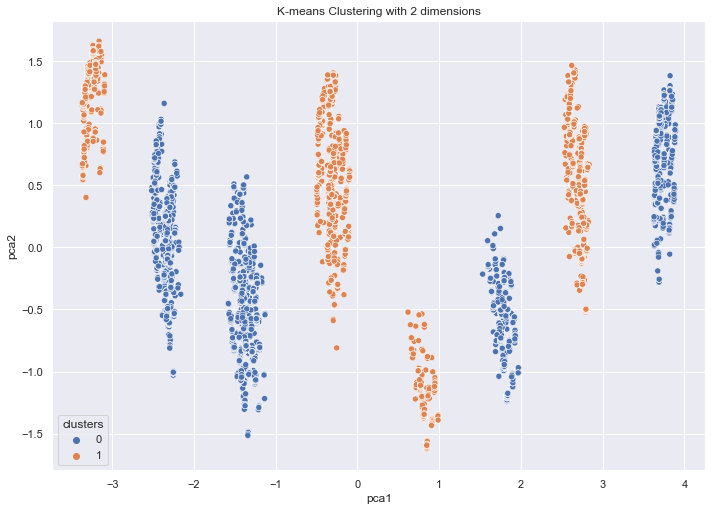

In [42]:
# graficar los datos etiquetados con k-means
from sklearn.decomposition import PCA

pca_num_components = 2

# Ejecutamos PCA en los datos y reducimos las dimensiones en dimensiones pca_num_components
reduced_data = PCA(n_components=pca_num_components).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

# Graficamos
sns.scatterplot(x="pca1", y="pca2", hue=df['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

* Utilizando solo los dos primeros PCA se lográ una buena agrupación de los datos.

### 3.-

In [25]:
# Obtenemos el conjunto de datos con las variables numéricas y su respectivo cluster
aux = ['year','desplazamiento','cilindros','co2','consumo_litros_milla','cluster']
df_nume = df[list(aux)]
df_nume

,year,desplazamiento,cilindros,co2,consumo_litros_milla,cluster
0,0.000000,0.243590,0.142857,0.398014,0.331027,6
1,0.000000,0.461538,0.285714,0.527672,0.475113,3
2,0.029412,0.243590,0.142857,0.424351,0.360294,6
3,0.029412,0.461538,0.285714,0.527672,0.475113,3
4,0.088235,0.410256,0.285714,0.424351,0.360294,6
...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0
36788,0.941176,0.038462,0.071429,0.182174,0.096886,4
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0


**Promedio**

In [33]:
# Agrupamos según cluster
new = df_new.groupby("cluster")

# Calculamos el promedio
new.mean().reset_index()

,cluster,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,0,0.695702,0.179404,0.150728,0.240178,0.156814
1,1,0.524326,0.250778,0.195544,0.304383,0.226563
2,2,0.409209,0.333730,0.257964,0.354182,0.281221
3,3,0.384236,0.585590,0.430797,0.510289,0.454503
4,4,0.438404,0.159576,0.141184,0.242287,0.156504
5,5,0.452443,0.562730,0.405562,0.501887,0.442585
6,6,0.476852,0.450916,0.327240,0.409956,0.343253
7,7,0.588065,0.362121,0.299467,0.354068,0.282213


**Moda**

In [40]:
# Calculamos la moda
new.agg(pd.Series.mode)

,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.970588,0.179487,0.142857,0.275108,0.194444
1,0.823529,0.179487,0.142857,0.317749,0.241830
2,0.000000,0.307692,0.285714,0.374603,0.305011
3,0.000000,0.564103,0.428571,0.454199,0.393464
4,0.029412,0.179487,0.142857,0.275108,0.194444
5,0.558824,0.653846,0.428571,0.454199,0.393464
6,0.029412,0.474359,0.285714,0.424351,0.331027
7,0.617647,0.307692,0.285714,0.374603,0.281734


### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.

### 1.-

In [55]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300,600,1000]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()

,Number of Clusters,Score
0,5,129172.726063
1,10,83419.989362
2,20,66860.305247
3,30,56562.949308
4,50,45576.407649


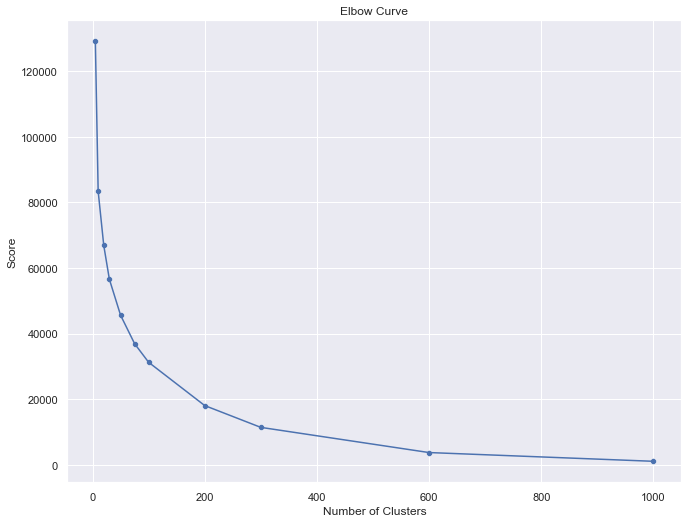

In [56]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

- Se aprecia que para el rango solicitado no se obtiene una reducción en la suma total de cuadrados internos que tienda a estabilizarse. Por consiguiente, se extiende el rango hasta 1000 clusters para analizar.
- Se tiene que el valor sigue sin estabilizarse, dado que el análisis clúster es una técnica multivariante cuya idea básica es clasificar objetos formando grupos/conglomerados que sean lo más homogéneos posible dentro de si mismos y heterogéneos entre sí, podemos concluir que el conjunto de datos analizados es muy heterogeneo, y por consiguiente, no es posible obtener un número de clusters razonable para agrupar.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases). 

El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [3]:
dataset = load_iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'

iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris[target] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## PCA

In [4]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


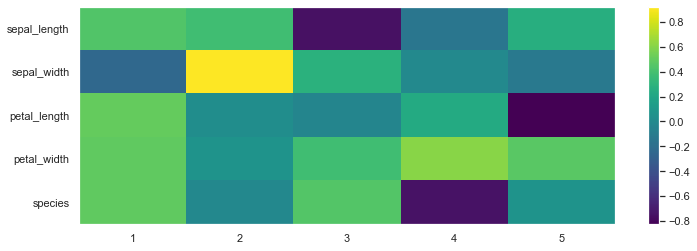

In [5]:
# Heatmap componentes
# ==============================================================================
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

* La influencia de las variables en cada componente puede analizarse visualmente con un gráfico de tipo heatmap.
    * En el PC1 la largo del sépalo, largo del pétalo, ancho del pétalo y especie influyen por igual. El ancho del sépalo influye en menor medida.
    * Se aprecia claramente que la variable más influyente en PC2 es el ancho del sépalo

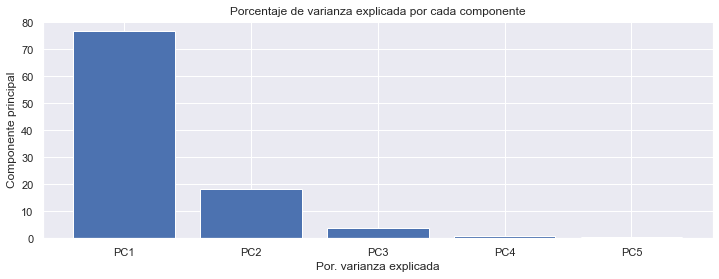

In [6]:
# graficar varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

* El fácilmente apreciable que solo con el primer PC es posible obtener una proporción respecto al total de un 76.74%

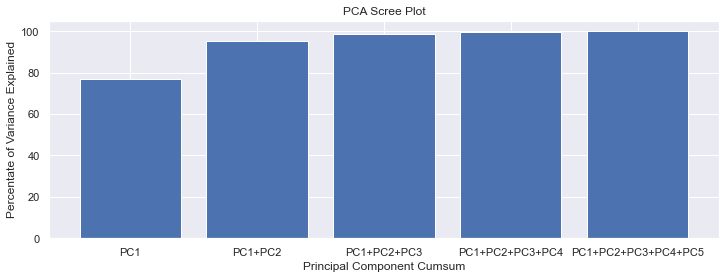

Las probabilidades acumuladas son: 

[76.74 95.02 98.74 99.58 99.99]


In [7]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', 'PC1+PC2', 'PC1+PC2+PC3', 'PC1+PC2+PC3+PC4','PC1+PC2+PC3+PC4+PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

print('Las probabilidades acumuladas son: \n')
print(percent_variance_cum)

- Solo con las primeras dos componentes se logra explicar el 95.02%. Graficaremos aplicando esta reducción.

In [8]:
# ajustar modelo: k-means
from sklearn.cluster import KMeans

X = np.array(iris)
kmeans = KMeans(n_clusters=5,n_init=25, random_state=123)
kmeans.fit(X)

centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

# etiquetar los datos con los clusters encontrados
iris["cluster"] = clusters
iris["cluster"] = iris["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids, columns=list(iris.columns[:-1]))
centroids_df["cluster"] = [1,2,3,4,5]

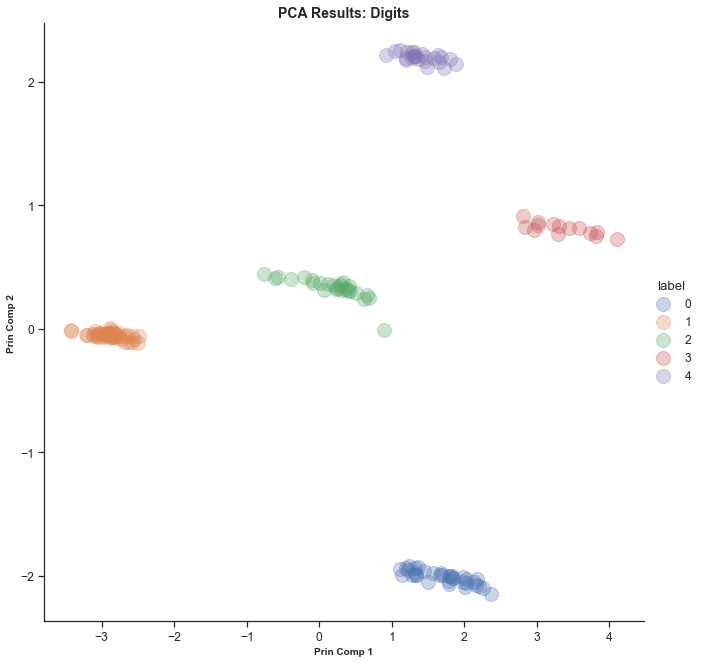

In [9]:
scaler = StandardScaler()

# graficar los datos etiquetados con k-means
from sklearn.decomposition import PCA

pca_num_components = 2

# Ejecutamos PCA en los datos y reducimos las dimensiones en dimensiones pca_num_components
reduced_data = PCA(n_components=pca_num_components).fit_transform(iris)
results = pd.DataFrame(reduced_data,columns=['PC1','PC2'])
results['label'] = iris['cluster']

# Establecer estilo de diagrama de dispersión
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Crear diagrama de dispersión del conjunto de datos
sns.lmplot(x='PC1',
           y='PC2',
           data=results,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

* Esto varia si se agrupa según especie

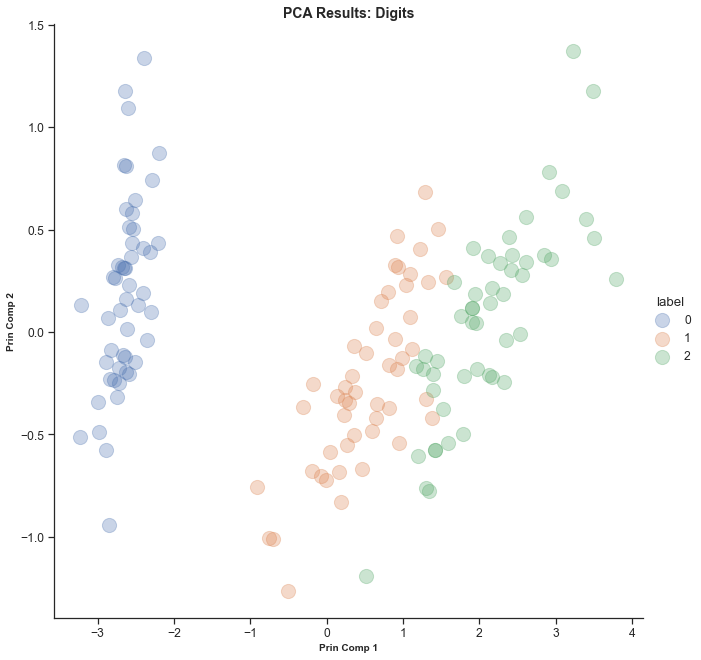

In [17]:
scaler = StandardScaler()

X = iris.drop(columns=['species','cluster'])
y = iris['species']
    
embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)
    
df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['label'] = y

# Establecer estilo de diagrama de dispersión
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Crear diagrama de dispersión del conjunto de datos
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

### TSNE

In [16]:
scaler = StandardScaler()

# Aplicamos la metodología TSNE
embedding = TSNE(n_components=2,init='pca',learning_rate='auto')
X_transform = embedding.fit_transform(iris)
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = iris['cluster']

C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


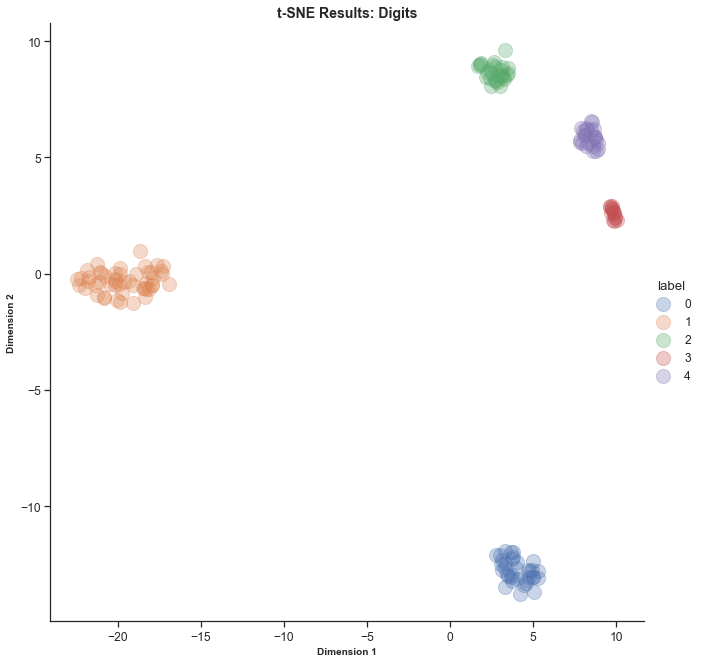

In [17]:
# Graficamos los dígitos TSNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

In [19]:
# tsne
scaler = StandardScaler()

X = iris.drop(columns=['species','cluster'])
y = iris['species']
    
embedding = TSNE(n_components=2,init='pca',learning_rate='auto')
X_transform = embedding.fit_transform(X)
    
df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['label'] = y

C:\Users\diego.mera\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


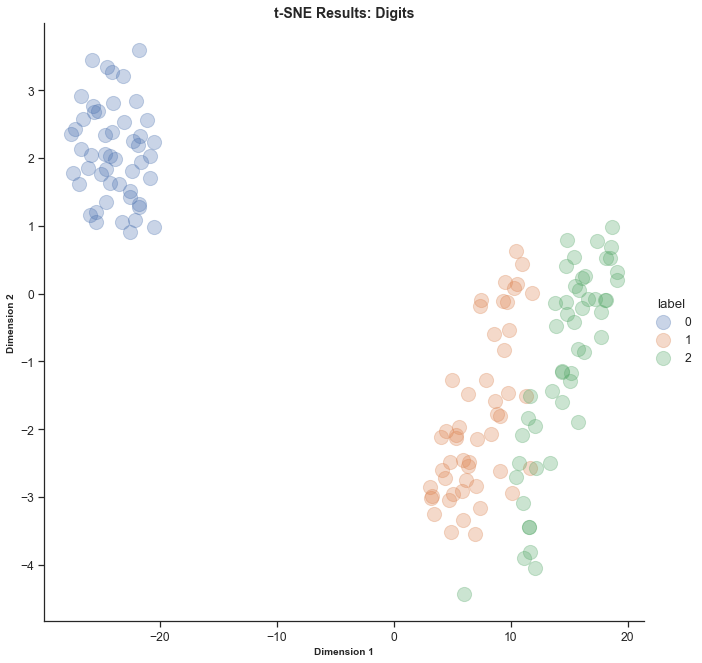

In [20]:
# Graficamos los dígitos TSNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='label',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

### Conclusión

* Para el caso de estudio del data frame iris no se aprecian diferencias significativas en los distintos métodos de reducción de dimensionalidad
* Para ambos se logra apreciar de buena forma la división en grupos acorde a cierta categorización. En esta ocasión graficamos acorde a la especie de la flor y también generan clusters y utilizando solo dos de estos.